In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [19]:
cl=[]
df= pd.read_csv('./winequality-red.csv')
for num in df['quality']:
    if num<6:
        num='average_quality'
    elif num>=5:
        num='high_quality'
    cl.append(num)
df['quality']=cl

In [41]:
cl=[]
for num in df['fixed acidity']:
    if num<7:
        num='low_fixed'
    elif 7<=num<11:
        num='average_fixed'
    elif num>=11:
        num='high_fixed'
    cl.append(num)
df['fixed acidity']=cl

In [42]:
cl=[]
for num in df['volatile acidity']:
    if num<0.3:
        num='low_volatile'
    elif 0.3<=num<0.7:
        num='average_volatile'
    elif num>=0.7:
        num='high_volatile'
    cl.append(num)
df['volatile acidity']=cl


In [43]:
cl=[]
for num in df['citric acid']:
    if num<0.2:
        num='low_citric'
    elif 0.2<=num<0.5:
        num='average_citric'
    elif num>=0.5:
        num='high_citric'
    cl.append(num)
df['citric acid']=cl

In [44]:
cl=[]
for num in df['residual sugar']:
    if num<2:
        num='low_residual_sugar'
    elif 2<=num<4:
        num='average_residual_sugar'
    elif num>=4:
        num='high_residual_sugar'
    cl.append(num)
df['residual sugar']=cl

In [24]:
cl=[]
for num in df['chlorides']:
    if num<0.08:
        num='low_chlorides'
    elif 0.08<=num<0.1:
        num='average_chlorides'
    elif num>=0.1:
        num='high_chlorides'
    cl.append(num)
df['chlorides']=cl

In [45]:
cl=[]
for num in df['free sulfur dioxide']:
    if num<20:
        num='low_free'
    elif 20<=num<50:
        num='average_free'
    elif num>=50:
        num='high_free'
    cl.append(num)
df['free sulfur dioxide']=cl

In [46]:
cl=[]
for num in df['total sulfur dioxide']:
    if num<50:
        num='low_total'
    elif 50<=num<100:
        num='average_total'
    elif num>=100:
        num='high_total'
    cl.append(num)
df['total sulfur dioxide']=cl

In [47]:
cl=[]
for num in df['density']:
    if num<0.995:
        num='low_density'
    elif 0.995<=num<1:
        num='average_density'
    elif num>=1:
        num='high_density'
    cl.append(num)
df['density']=cl

In [48]:
cl=[]
for num in df['pH']:
    if num<3:
        num='low_pH'
    elif 3<=num<3.4:
        num='average_pH'
    elif num>=3.4:
        num='high_pH'
    cl.append(num)
df['pH']=cl

In [49]:
cl=[]
for num in df['sulphates']:
    if num<0.5:
        num='low_sulphates'
    elif 0.5<=num<0.7:
        num='average_sulphates'
    elif num>=0.7:
        num='high_sulphates'
    cl.append(num)
df['sulphates']=cl

In [50]:
cl=[]
for num in df['alcohol']:
    if num<9:
        num='low_alcohol'
    elif 9<=num<12:
        num='average_alcohol'
    elif num>=12:
        num='high_alcohol'
    cl.append(num)
df['alcohol']=cl

print(df)

     fixed acidity volatile acidity  citric acid       residual sugar  \
0       high_fixed    high_volatile   low_citric  high_residual_sugar   
1       high_fixed    high_volatile   low_citric  high_residual_sugar   
2       high_fixed    high_volatile  high_citric  high_residual_sugar   
3       high_fixed    high_volatile  high_citric  high_residual_sugar   
4       high_fixed    high_volatile   low_citric  high_residual_sugar   
...            ...              ...          ...                  ...   
1594    high_fixed    high_volatile  high_citric  high_residual_sugar   
1595    high_fixed    high_volatile  high_citric  high_residual_sugar   
1596    high_fixed    high_volatile  high_citric  high_residual_sugar   
1597    high_fixed    high_volatile  high_citric  high_residual_sugar   
1598    high_fixed    high_volatile  high_citric  high_residual_sugar   

      chlorides free sulfur dioxide total sulfur dioxide       density  \
0             2            low_free            lo

In [51]:
LE=LabelEncoder()
result=[]
for feature in df.columns:
    df[feature] = LE.fit_transform(df[feature])
print(df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0                 1                 0            1               1          2   
1                 1                 0            1               1          0   
2                 1                 0            0               1          0   
3                 1                 0            0               1          2   
4                 1                 0            1               1          2   
...             ...               ...          ...             ...        ...   
1594              1                 0            0               1          0   
1595              1                 0            0               1          2   
1596              1                 0            0               1          2   
1597              1                 0            0               1          2   
1598              1                 0            0               1          2   

      free sulfur dioxide  

In [103]:
X=np.array(pd.DataFrame(df,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']))
y = np.array(pd.DataFrame(df, columns=["quality"]))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [115]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [116]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=2)
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [117]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy',splitter='random')
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [118]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=None)
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [119]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=None)
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [120]:
decision_tree_model = DecisionTreeClassifier(criterion='gini')
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [121]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',splitter='best')
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [122]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',splitter='random')
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [123]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


In [124]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=None)
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))
print(result)


[0.628125, 0.628125, 0.628125, 0.628125, 0.628125, 0.628125, 0.628125, 0.625, 0.628125, 0.63125, 0.625, 0.64375, 0.571875, 0.578125, 0.575, 0.571875, 0.575, 0.571875, 0.571875, 0.596875, 0.571875, 0.575, 0.571875, 0.596875, 0.571875, 0.571875, 0.571875, 0.571875, 0.571875, 0.578125, 0.603125, 0.58125]


In [125]:
X=np.array(pd.DataFrame(df,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']))
y = np.array(pd.DataFrame(df, columns=["quality"]))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [126]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=None)#가장낮앗음
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
result.append(accuracy_score(y_pred,y_test))


[Text(153.21726842629482, 209.07692307692307, 'X[7] <= 0.582\ngini = 0.497\nsamples = 1279\nvalue = [592, 687]'),
 Text(59.66959661354582, 192.35076923076923, 'X[4] <= 0.149\ngini = 0.405\nsamples = 259\nvalue = [73, 186]'),
 Text(23.342629482071715, 175.62461538461537, 'X[3] <= 0.614\ngini = 0.487\nsamples = 55\nvalue = [23, 32]'),
 Text(20.674900398406376, 158.89846153846153, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(26.010358565737054, 158.89846153846153, 'X[0] <= 1.203\ngini = 0.483\nsamples = 54\nvalue = [22, 32]'),
 Text(23.342629482071715, 142.1723076923077, 'X[9] <= 0.066\ngini = 0.486\nsamples = 53\nvalue = [22, 31]'),
 Text(10.670916334661355, 125.44615384615385, 'X[6] <= 1.805\ngini = 0.497\nsamples = 26\nvalue = [12, 14]'),
 Text(5.335458167330677, 108.72, 'X[2] <= 0.914\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(2.6677290836653387, 91.99384615384615, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(8.003187250996016, 91.99384615384615, 'gini = 0.0\nsample

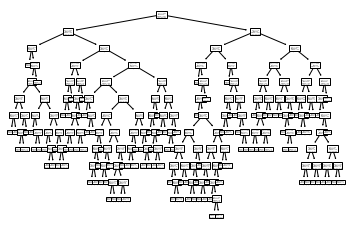

In [127]:
tree.plot_tree(decision_tree_model)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


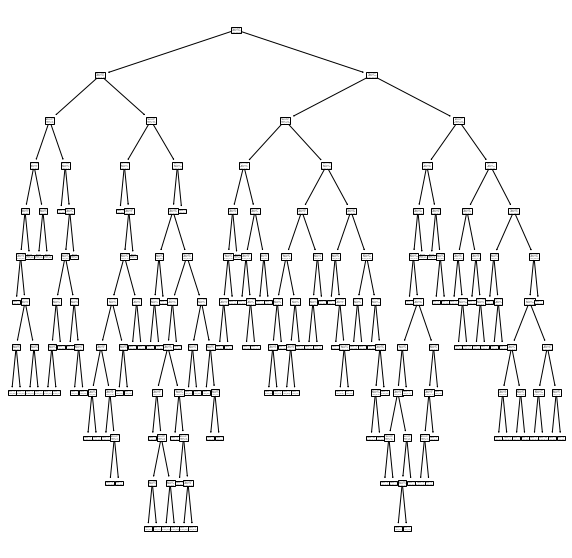

In [66]:
plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_model)

print(df.columns)


[Text(255.36211404382468, 522.6923076923077, 'density <= 0.582\ngini = 0.497\nsamples = 1279\nvalue = [592, 687]\nclass = high quality'),
 Text(99.44932768924302, 480.8769230769231, 'chlorides <= 0.149\ngini = 0.405\nsamples = 259\nvalue = [73, 186]\nclass = high quality'),
 Text(38.904382470119515, 439.0615384615385, 'residual sugar <= 0.614\ngini = 0.487\nsamples = 55\nvalue = [23, 32]\nclass = high quality'),
 Text(34.458167330677284, 397.2461538461539, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = average quality'),
 Text(43.350597609561746, 397.2461538461539, 'fixed acidity <= 1.203\ngini = 0.483\nsamples = 54\nvalue = [22, 32]\nclass = high quality'),
 Text(38.904382470119515, 355.4307692307692, 'sulphates <= 0.066\ngini = 0.486\nsamples = 53\nvalue = [22, 31]\nclass = high quality'),
 Text(17.784860557768923, 313.61538461538464, 'total sulfur dioxide <= 1.805\ngini = 0.497\nsamples = 26\nvalue = [12, 14]\nclass = high quality'),
 Text(8.892430278884461, 271.8, 'citric acid <

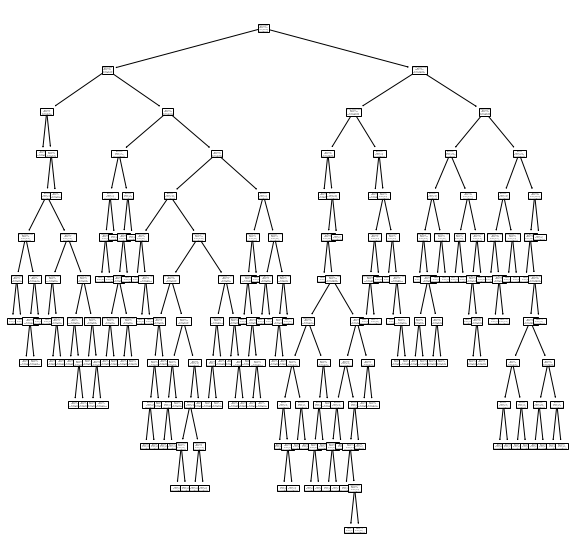

In [128]:
features=df.columns
class_name={0:'average quality',1:'high quality'}
plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_model,feature_names=features,class_names=class_name)


In [69]:
X_train_df=pd.DataFrame(X_train)
y_train_df=pd.DataFrame(y_train)
train_df=pd.concat([X_train_df,y_train_df],axis=1)
train_df.columns=df.columns
print(train_df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0                 1                 0            0               1          2   
1                 1                 0            0               1          1   
2                 1                 0            0               1          2   
3                 1                 0            0               1          2   
4                 1                 0            0               1          1   
...             ...               ...          ...             ...        ...   
1274              1                 0            0               1          0   
1275              1                 0            0               1          0   
1276              1                 0            0               1          2   
1277              1                 0            0               1          0   
1278              1                 0            0               1          2   

      free sulfur dioxide  

In [129]:
h0p0=train_df[(train_df['fixed acidity']==0) &(train_df["quality"]==0)]
h0p1=train_df[(train_df['fixed acidity']==0) &(train_df["quality"]==1)]
h1p0=train_df[(train_df['fixed acidity']==1) &(train_df["quality"]==0)]
h1p1=train_df[(train_df['fixed acidity']==1) &(train_df["quality"]==1)]
h2p0=train_df[(train_df['fixed acidity']==2) &(train_df["quality"]==0)]
h2p1=train_df[(train_df['fixed acidity']==2) &(train_df["quality"]==1)]

In [130]:
gini_humidity_0 = 1-(len(h0p0)/(len(h0p0)+len(h0p1)))**2-(len(h0p1)/(len(h0p0)+len(h0p1)))**2
gini_humidity_1 = 1-(len(h1p0)/(len(h1p0)+len(h1p1)))**2-(len(h1p1)/(len(h1p0)+len(h1p1)))**2
gini_humidity_2 = 1-(len(h2p0)/(len(h2p0)+len(h2p1)))**2-(len(h2p1)/(len(h2p0)+len(h2p1)))**2

In [131]:
print((len(h0p0)+len(h0p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)+len(h2p0)+len(h2p1))*gini_humidity_0)
print((len(h1p0)+len(h1p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)+len(h2p0)+len(h2p1))*gini_humidity_1)
print((len(h2p0)+len(h2p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)+len(h2p0)+len(h2p1))*gini_humidity_2)

0.005026248184965933
0.48590988975574223
0.005646772652245678


In [132]:
best_str=[]
best_num=[]
best=12
for col in df.columns:
    if col=='quality':
        break
    h0p0=train_df[(train_df[col]==0) &(train_df["quality"]==0)]
    h0p1=train_df[(train_df[col]==0) &(train_df["quality"]==1)]
    h1p0=train_df[(train_df[col]==1) &(train_df["quality"]==0)]
    h1p1=train_df[(train_df[col]==1) &(train_df["quality"]==1)]
    h2p0=train_df[(train_df[col]==2) &(train_df["quality"]==0)]
    h2p1=train_df[(train_df[col]==2) &(train_df["quality"]==1)]
    gini_humidity_0 = 1-(len(h0p0)/(len(h0p0)+len(h0p1)))**2-(len(h0p1)/(len(h0p0)+len(h0p1)))**2
    gini_humidity_1 = 1-(len(h1p0)/(len(h1p0)+len(h1p1)))**2-(len(h1p1)/(len(h1p0)+len(h1p1)))**2
    gini_humidity_2 = 1-(len(h2p0)/(len(h2p0)+len(h2p1)))**2-(len(h2p1)/(len(h2p0)+len(h2p1)))**2

    val0=(len(h0p0)+len(h0p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)+len(h2p0)+len(h2p1))*gini_humidity_0
    val1=(len(h1p0)+len(h1p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)+len(h2p0)+len(h2p1))*gini_humidity_1
    val2=(len(h2p0)+len(h2p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)+len(h2p0)+len(h2p1))*gini_humidity_2
    result2=val0+val1+val2
    best_num.append(result2)
    best_str.append(col)
    if best<result2:
        best=best
    else:
        best=result2
j=0
for i in best_num:
    if i == best:
        print("Best: "+best_str[j] +":"+str(best))

        break
    j=j+1

ZeroDivisionError: division by zero